In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
# Load the datasets
fake_news_df = pd.read_csv('C:/Users/gangi/OneDrive/Desktop/FakeNewsDetection/Fake.csv')
true_news_df = pd.read_csv('C:/Users/gangi/OneDrive/Desktop/FakeNewsDetection/True.csv')

# Add labels to the datasets
fake_news_df['label'] = 0  # Fake news
true_news_df['label'] = 1  # True news

C:\Users\gangi\AppData\Local\Temp\ipykernel_11456\4157324465.py:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_news_df = pd.read_csv('C:/Users/gangi/OneDrive/Desktop/FakeNewsDetection/Fake.csv')


In [3]:

# Combine the datasets
news_df = pd.concat([fake_news_df, true_news_df])

# Shuffle the dataset
news_df = news_df.sample(frac=1).reset_index(drop=True)


In [4]:

# Preprocess text data
def preprocess_text(text):
    text = text.lower()  # Lowercase the text
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text

news_df['text'] = news_df['text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(news_df['text'], news_df['label'], test_size=0.2, random_state=42)


In [5]:

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [6]:

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

In [7]:

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


Training Logistic Regression...
Results for Logistic Regression:
Accuracy: 0.9898708815672307
Precision: 0.9895567417034115
Recall: 0.9893271461716937
F1-Score: 0.9894419306184012
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4674
           1       0.99      0.99      0.99      4310

    accuracy                           0.99      8984
   macro avg       0.99      0.99      0.99      8984
weighted avg       0.99      0.99      0.99      8984



C:\Users\gangi\AppData\Local\Temp\ipykernel_11456\3066054528.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{


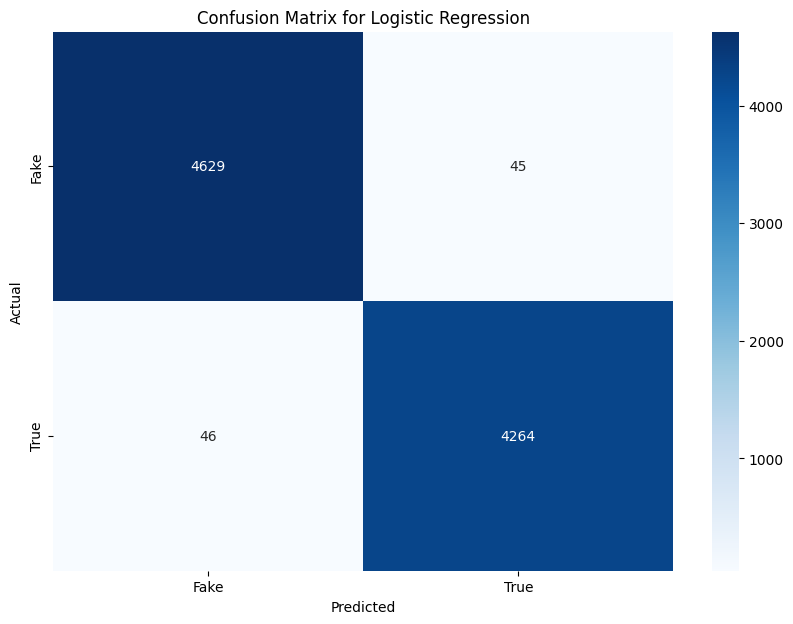

Training Random Forest...
Results for Random Forest:
Accuracy: 0.9959928762243989
Precision: 0.994447015270708
Recall: 0.997215777262181
F1-Score: 0.9958294717330862
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4674
           1       0.99      1.00      1.00      4310

    accuracy                           1.00      8984
   macro avg       1.00      1.00      1.00      8984
weighted avg       1.00      1.00      1.00      8984



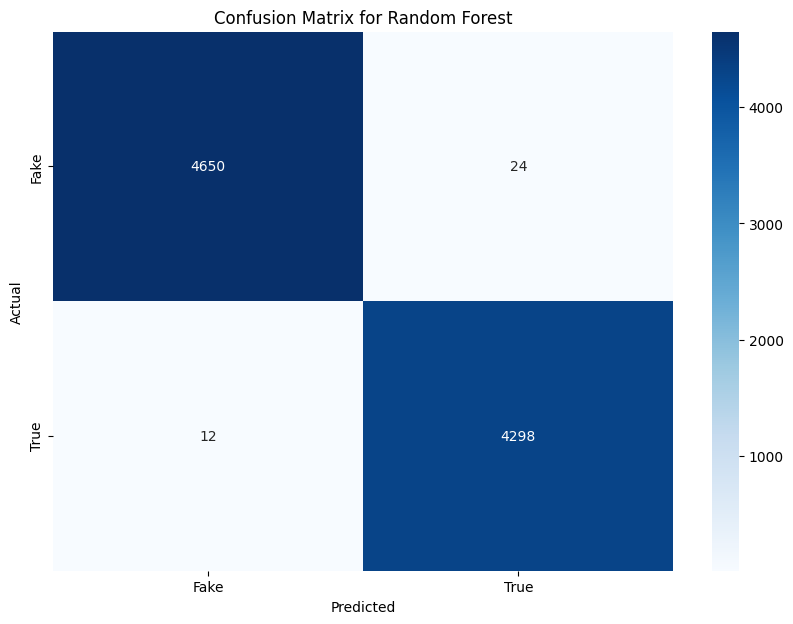

Training SVM...
Results for SVM:
Accuracy: 0.9958815672306323
Precision: 0.9946746932160222
Recall: 0.9967517401392111
F1-Score: 0.9957121335033028
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4674
           1       0.99      1.00      1.00      4310

    accuracy                           1.00      8984
   macro avg       1.00      1.00      1.00      8984
weighted avg       1.00      1.00      1.00      8984



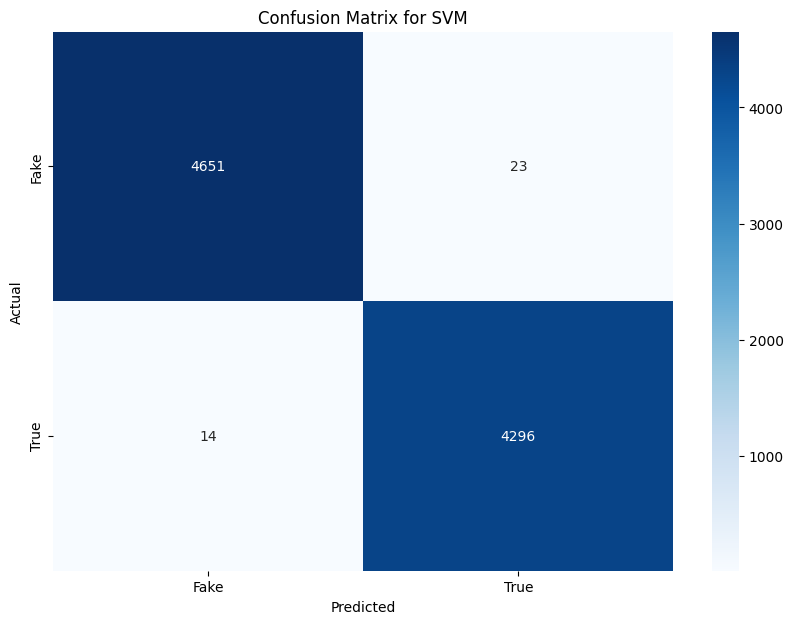

Training Gradient Boosting...
Results for Gradient Boosting:
Accuracy: 0.9954363312555654
Precision: 0.9935260115606936
Recall: 0.9969837587006961
F1-Score: 0.9952518818760857
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4674
           1       0.99      1.00      1.00      4310

    accuracy                           1.00      8984
   macro avg       1.00      1.00      1.00      8984
weighted avg       1.00      1.00      1.00      8984



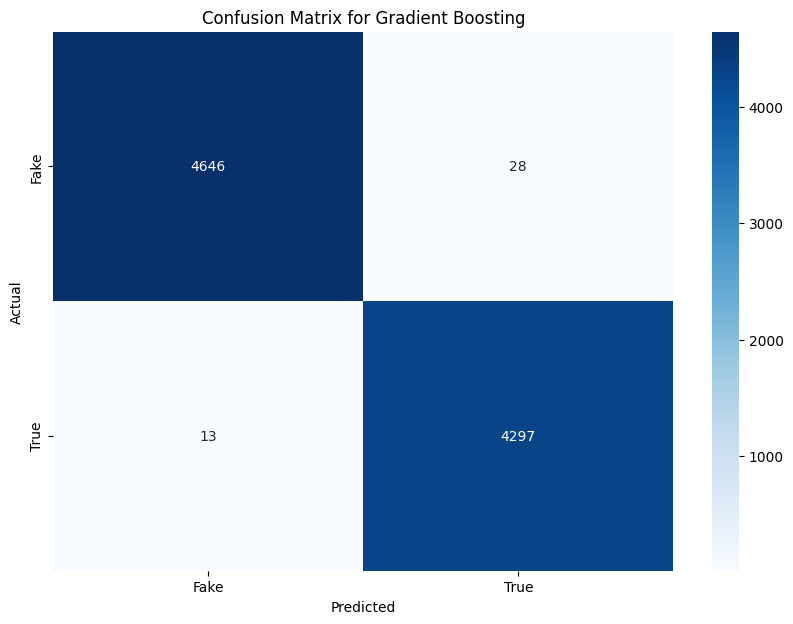

In [8]:

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Results for {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Classification Report:\n", report)

      # Store results in the DataFrame
    results = pd.concat([results, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }])], ignore_index=True)
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

In [9]:

# Display the comparison table
print("Model Comparison Table:")
print(results)
  

Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.989871   0.989557  0.989327  0.989442
1        Random Forest  0.995993   0.994447  0.997216  0.995829
2                  SVM  0.995882   0.994675  0.996752  0.995712
3    Gradient Boosting  0.995436   0.993526  0.996984  0.995252


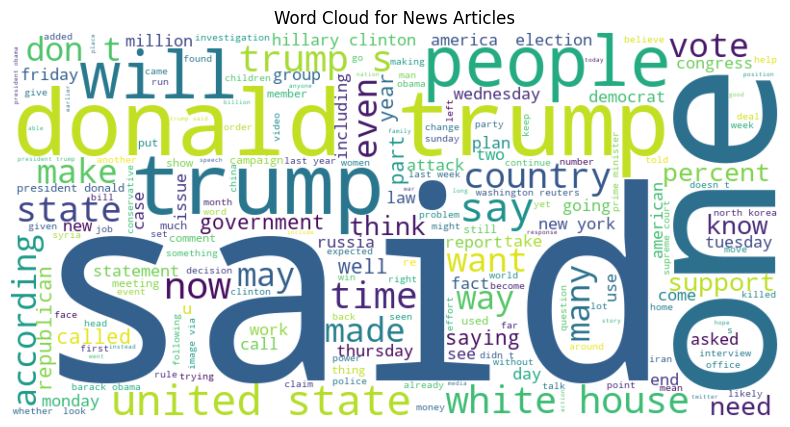

In [10]:

# Generate and plot the word cloud
text_data = ' '.join(news_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Word Cloud for News Articles")
plt.show()

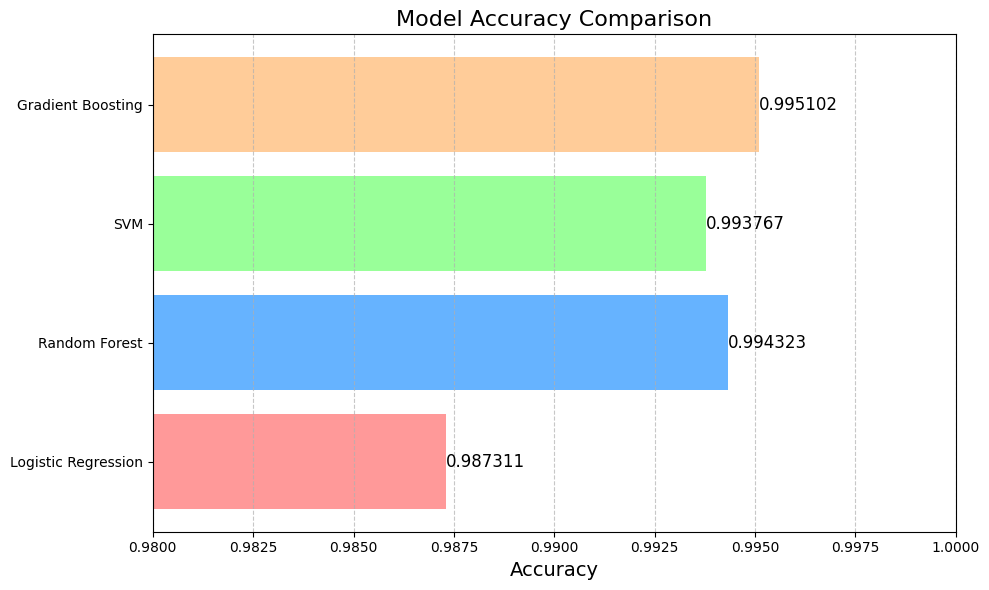

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracy
models = [
    "Logistic Regression",
    "Random Forest",
    "SVM",
    "Gradient Boosting"
]
accuracy = [0.987311, 0.994323, 0.993767, 0.995102]

# Define colors for each model
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracy, color=colors)
plt.xlabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlim(0.98, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add accuracy values on the bars
for index, value in enumerate(accuracy):
    plt.text(value, index, f"{value:.6f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()


In [12]:
def predict_fake_news(input_text, model):
    processed_text = preprocess_text(input_text)
    text_tfidf = tfidf_vectorizer.transform([processed_text])
    prediction = model.predict(text_tfidf)
    return "Fake News" if prediction[0] == 0 else "True News"

# Take input from the user
user_input_text = input("Enter the news article text: ")
chosen_model = models['Logistic Regression']  # Change this to test other models
result = predict_fake_news(user_input_text, chosen_model)
print("Prediction:", result)

Prediction: Fake News
